# Acquire and Prep - Wrangle

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from env import host, user, password

from sklearn.model_selection import train_test_split



In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
# function to query database and return zillow df
def get_data_from_sql():
    query = """
    SELECT bedroomcnt as bedrooms, bathroomcnt as bathrooms, calculatedfinishedsquarefeet as square_feet, 
    taxvaluedollarcnt FROM properties_2017
    JOIN predictions_2017 as p USING(parcelid)
    WHERE transactiondate < '2018-01-01' AND propertylandusetypeid LIKE '261'
    """
    df = pd.read_sql(query, get_connection('zillow'))
    return df

In [4]:
df = get_data_from_sql()

In [5]:
df.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0


In [6]:
df.shape



(52441, 4)

In [7]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
bedrooms,52441.0,3.300681,0.949094,0.0,3.0,3.0,4.00,14.0
bathrooms,52441.0,2.299403,1.022772,0.0,2.0,2.0,3.00,18.0
square_feet,52359.0,1922.890754,1004.365838,128.0,1268.0,1659.0,2306.00,21929.0
taxvaluedollarcnt,52440.0,529688.163921,751894.553363,1000.0,193747.5,373612.0,619301.25,49061236.0


In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52441 non-null  float64
 1   bathrooms          52441 non-null  float64
 2   square_feet        52359 non-null  float64
 3   taxvaluedollarcnt  52440 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [9]:
df.value_counts()

bedrooms  bathrooms  square_feet  taxvaluedollarcnt
3.0       2.5        1689.0       632000.0             3
2.0       1.5        1080.0       137444.0             3
3.0       2.0        1541.0       255000.0             3
2.0       1.5        1350.0       467000.0             3
          1.0        832.0        455000.0             3
                                                      ..
3.0       2.0        1328.0       521062.0             1
                     1329.0       87354.0              1
                                  124876.0             1
                                  160579.0             1
14.0      18.0       18654.0      49061236.0           1
Length: 52145, dtype: int64

# Prepare the Data

In [10]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

bedrooms              0
bathrooms             0
square_feet          82
taxvaluedollarcnt     1
dtype: int64

In [11]:
# Find columns with missing values and the total of missing values.

missing = df.isnull().sum()
missing[missing > 0]

square_feet          82
taxvaluedollarcnt     1
dtype: int64

In [12]:
# show all columns with missing values
missing.head()

bedrooms              0
bathrooms             0
square_feet          82
taxvaluedollarcnt     1
dtype: int64

In [13]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()




bedrooms             False
bathrooms            False
square_feet           True
taxvaluedollarcnt     True
dtype: bool

In [14]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]




Index(['square_feet', 'taxvaluedollarcnt'], dtype='object')

Finding Odd Values

Let's find the odd value that is causing this numeric column to be coerced into an object data type.

In [15]:
df.bedrooms.value_counts(dropna=False, ascending=True)



14.0        1
11.0        1
10.0        2
12.0        3
9.0         8
8.0        24
7.0       106
0.0       137
1.0       612
6.0       635
5.0      3973
2.0      8340
4.0     15240
3.0     23359
Name: bedrooms, dtype: int64

In [16]:
# check value counts for bedrooms column

df['bedrooms'].value_counts(ascending=False)

3.0     23359
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedrooms, dtype: int64

In [17]:
#check value counts for bathrooms column

df['bathrooms'].value_counts(ascending=True)




13.0        1
18.0        1
11.0        3
8.5         3
10.0        5
9.0        13
7.5        16
6.5        47
8.0        53
7.0        88
0.0       121
5.5       224
6.0       322
4.5       687
5.0       803
1.5       841
3.5       918
4.0      2227
2.5      3934
1.0      9568
3.0     10673
2.0     21893
Name: bathrooms, dtype: int64

In [18]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

In [19]:
# Now .info() shows us that bedrooms has a Null value instead of a whitespace disguised as a non-null value.

df.isnull().any()

bedrooms             False
bathrooms            False
square_feet           True
taxvaluedollarcnt     True
dtype: bool

## Drop Null Values

In [20]:
df.shape

(52441, 4)

In [21]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52358 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52358 non-null  float64
 1   bathrooms          52358 non-null  float64
 2   square_feet        52358 non-null  float64
 3   taxvaluedollarcnt  52358 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [22]:
# confirmation that above code worked to drop nulls
df.isnull().any()

bedrooms             False
bathrooms            False
square_feet          False
taxvaluedollarcnt    False
dtype: bool

In [23]:
df.shape

(52358, 4)

In [24]:
# drop duplicates
df = df.drop_duplicates()

In [25]:
# confirm cell above that duplicates have been dropped
df.shape

(52145, 4)

In [26]:
#function to remove outliers in x columns

def remove_outliers(df, k, col_list):
    ''' 
    Takes in a df, k, and list of columns returns
    a df with removed outliers
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [27]:
# use above function to remove outliers for columns listed and apply to new df
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'square_feet', 'taxvaluedollarcnt'])
df

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0
...,...,...,...,...
52436,4.0,2.0,1633.0,346534.0
52437,2.0,2.0,1286.0,354621.0
52438,4.0,2.0,1612.0,67205.0
52439,3.0,1.0,1032.0,49546.0


In [28]:
# confirm outliers removed
df.shape

(45433, 4)

In [29]:
# convert dtypes to int

df = df.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   bedrooms           45433 non-null  int64
 1   bathrooms          45433 non-null  int64
 2   square_feet        45433 non-null  int64
 3   taxvaluedollarcnt  45433 non-null  int64
dtypes: int64(4)
memory usage: 1.7 MB


## Visualize Distributions



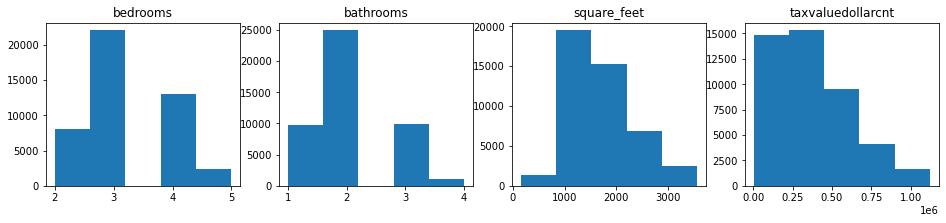

In [30]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet','taxvaluedollarcnt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)



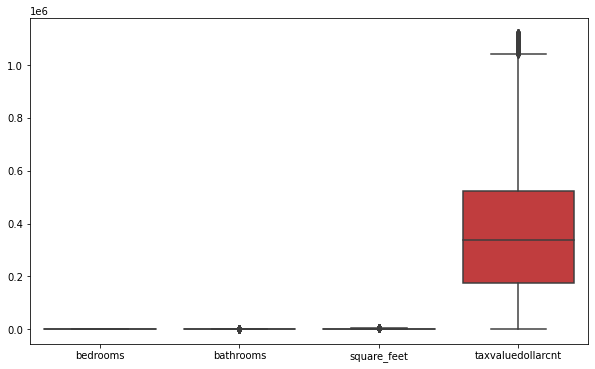

In [31]:
plt.figure(figsize=(10,6))

# Create boxplots for all.
sns.boxplot(data=df)
plt.show()

In [32]:
def show_boxplot(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = ['bedrooms', 'bathrooms', 'square_feet', 'taxvaluedollarcnt']

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()

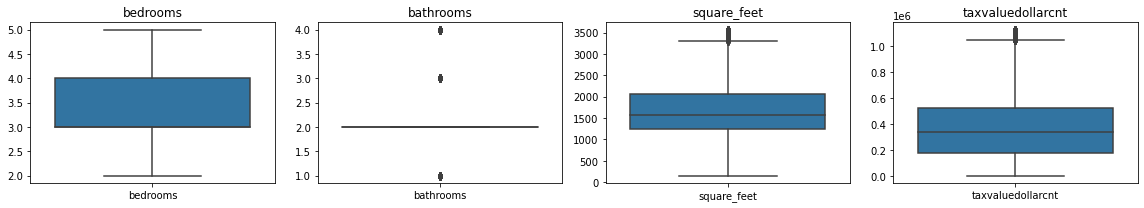

In [33]:
show_boxplot(df)

## Create function for acquire and prep


In [34]:
#will update

def wrangle_zillow():
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from csv file.
    df = get_data_from_sql()
    
    # Replace white space values with NaN values.
    df = df.replace(r'^\s*$', np.nan, regex=True)
    
    # Drop any Duplicates
    df = df.drop_duplicates()

    # Drop all rows with NaN values.
    df = df[df.bathrooms != 0]
    df = df[df.bedrooms != 0]
    
    # Remove Outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'square_feet', 'taxvaluedollarcnt'])


    # clean data with split
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    
    return df 

In [35]:
wrangle_zillow = wrangle_zillow()

In [36]:
wrangle_zillow.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0


In [37]:
wrangle_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           45433 non-null  float64
 1   bathrooms          45433 non-null  float64
 2   square_feet        45433 non-null  float64
 3   taxvaluedollarcnt  45433 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [38]:
wrangle_zillow.describe()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
count,45433.000000,45433.000000,45433.000000,4.543300e+04
mean,3.213391,2.105716,1706.263971,3.732971e+05
std,0.790168,0.729201,613.431857,2.446075e+05
min,2.000000,1.000000,152.000000,1.000000e+03
25%,3.000000,2.000000,1242.000000,1.746930e+05
50%,3.000000,2.000000,1576.000000,3.370340e+05
75%,4.000000,2.500000,2070.000000,5.221500e+05
max,5.000000,4.000000,3568.000000,1.124001e+06


In [39]:
wrangle_zillow.shape

(45433, 4)

In [40]:
## For Splitting:

# Only use train for exploration and for fitting
# Only use validate to validate models after fitting on train
# Only use test to test best model 

# Split data

# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train.

train, test = train_test_split(wrangle_zillow, test_size = .2, random_state = 123)
train, validate = train_test_split(train, test_size = .3, random_state = 123)



In [41]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (25442, 4)
validate -> (10904, 4)
test -> (9087, 4)


In [42]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(wrangle_zillow, test_size = .2, random_state = 222)
    train, validate = train_test_split(train, test_size = .3, random_state = 222)
    
    return train, validate, test

In [43]:
train, validate, test = split_data(wrangle_zillow)



In [44]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (25442, 4)
validate -> (10904, 4)
test -> (9087, 4)


In [45]:
train.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
16190,2.0,1.5,1248.0,190289.0
36908,3.0,2.0,1408.0,109487.0
8097,3.0,1.5,1032.0,248300.0
38541,3.0,2.0,986.0,145660.0
618,3.0,1.0,948.0,224273.0


In [46]:
train.shape

(25442, 4)

In [47]:
x_train = train[["bedrooms", "bathrooms", "square_feet"]]
y_train = train[["taxvaluedollarcnt"]]
x_test = test[["bedrooms", "bathrooms", "square_feet"]]
y_test = test[["taxvaluedollarcnt"]]

In [48]:
predictions=pd.DataFrame({'actual':y_train.taxvaluedollarcnt}).reset_index(drop=True)
predictions.head()

,actual
0,190289.0
1,109487.0
2,248300.0
3,145660.0
4,224273.0


# Exploration



- What is the relationship between square feet and taxvaluedollarcount?
    - Is it a linear relationship or is there no relationship?
    
- What is the relationship between bedroom count and taxvaluedollarcount?

- What is the relationship between bathroom count and taxvaluedollarcount?

- What is the relationship between bedroom 


In [49]:
from scipy import stats


In [50]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05

null_hypothesis = "taxvaluedollarcnt and bedrooms are independent"
alternative_hypothesis = "there is a relationship between taxvaluedollarcnt and bedrooms"

# Setup a crosstab of taxval to bedrooms
observed = pd.crosstab(train.square_feet, train.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that taxvaluedollarcnt and bedrooms are independent
Sufficient evidence to move forward understanding that there is a relationship between taxvaluedollarcnt and bedrooms


In [51]:
pd.crosstab(train.square_feet, train.taxvaluedollarcnt)

taxvaluedollarcnt,10504.0,13199.0,13352.0,13524.0,13820.0,14231.0,14577.0,15433.0,15692.0,15890.0,...,1119396.0,1119792.0,1120000.0,1120145.0,1120474.0,1122000.0,1122411.0,1123133.0,1123324.0,1124001.0
square_feet,,,,,,,,,,,,,,,,,,,,,
152.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3563.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3564.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
